<a href="https://colab.research.google.com/github/PepeuFBV/Basic_Assembler/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de dígitos usando rede neural densa (DNN)

Dupla: Pedro Figueira e Vinicius Gabriel

## Importando Bibliotecas

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Dataset

### Sobre o dataset

Conjunto de dados de dígitos manuscritos **MNIST**

O banco de dados MNIST de dígitos manuscritos, disponível nesta [página](http://yann.lecun.com/exdb/mnist/), possui um conjunto de treinamento de 60.000 imagens em escala de cinza 28x28 dos 10 dígitos ao longo de um conjunto de teste de 10.000 imagens. Os dígitos foram normalizados em tamanho e centralizados em uma imagem de tamanho fixo.

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

### Carregar e explorar conjunto de dados


In [48]:
data = tf.keras.datasets.mnist

(training_images, training_labels), (val_images, val_labels) = data.load_data()

In [49]:
# Serão 60.000 imagens de 28px 28px para o treinamento da arquitetura
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28)
(60000,)


In [50]:
# Serão 10.000 imagens de 28px 28px para o treinamento da arquitetura
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 178 255 105   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   6 188 253 216  14   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  14 202 253 253  23   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  12 199 253 128   6   0   

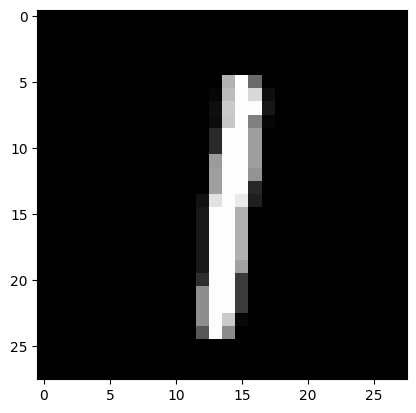

In [51]:
# Testando os números
indice_teste = 40
np.set_printoptions(linewidth=200)
print(training_images[indice_teste])
plt.imshow(training_images[indice_teste], cmap='gray')
print("\nEsse é o número: ", training_labels[indice_teste])

In [52]:
print("Range of values of pixels in image:", training_images.min(), "px - ", training_images.max(), "px")

Range of values of pixels in image: 0 px -  255 px


### Normalização dos dados

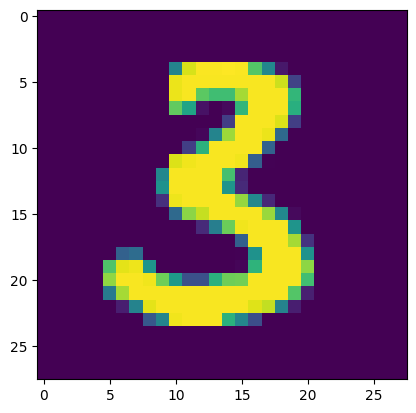

In [53]:
# A normalizando os dados de acordo com o tamanho máximo dos valores, isso deixará os valores de 0.0 a 1.0
# Nesse caso 0 é branco e 1 é preto
max_size = training_images.max()

training_images  = training_images / max_size
val_images = val_images / max_size

# Pode se inserir valores de 0 a 59999
test_image = 4233
plt.imshow(training_images[test_image]);

## Compilando o modelo

In [54]:
# Definindo os modelos
# A arquitetura 1 tem 1 camada, a arquitetura 2 tem 2 camadas e a arquitetura 3 tem 3 camadas
# O modelo 1 tem 10 neurônios, o modelo 2 tem 20 neurônios e o modelo 3 tem 30 neurônios
# A variação 1 é a Relu, já a variação 2 é Tanh
# Haverá um total de 18 modelos

# Arquitetura 1
A1M1V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), # 28px por 28px
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # números de 0-9 e softmax para deixar a curva mais 'soft', menos brusca

A1M1V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M2V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M2V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M3V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M3V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# Arquitetura 2
A2M1V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M1V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M2V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M2V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M3V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A2M3V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# Arquitetura 3
A3M1V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M1V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M2V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M2V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(20, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M3V1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(30, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A3M3V2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(30, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

A1M1V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Labels are presented as numeric [0,5,...] and not as an array
    metrics=['accuracy'] # Calculates how often predictions equal labels
    )

A1M1V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A1M2V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A1M2V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A1M3V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A1M3V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M1V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M1V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M2V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M2V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M3V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A2M3V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M1V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M1V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M2V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M2V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M3V1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

A3M3V2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

## Treinando o modelo

In [55]:
%%time
history = A1M1V1.fit(
    training_images,
    training_labels,
    epochs=20,
    )

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5345 - accuracy: 0.8448
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3055 - accuracy: 0.9129
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2704 - accuracy: 0.9237
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9269
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2450 - accuracy: 0.9308
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2383 - accuracy: 0.9327
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2322 - accuracy: 0.9344
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2275 - accuracy: 0.9353
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2226 - accuracy: 0.9373
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.218